In [287]:
import pandas as pd
import numpy as np
from datetime import datetime
from plotnine import *

In [288]:
climas = pd.read_csv("data/clima_cg_jp-semanal.csv", 
                      dtype={"temp_media": np.float64, "data": str})

In [289]:
display(climas)

,cidade,semana,tmedia,tmax,tmin,chuva,mes,ano
0,Campina Grande,1992-12-27T00:00:00Z,26.133333,30.4,20.7,0.0,12,1992
1,Campina Grande,1993-01-03T00:00:00Z,26.119048,32.4,19.3,0.0,1,1993
2,Campina Grande,1993-01-10T00:00:00Z,25.766667,32.2,19.7,0.0,1,1993
3,Campina Grande,1993-01-31T00:00:00Z,25.740000,32.0,19.9,0.4,1,1993
4,Campina Grande,1993-02-07T00:00:00Z,26.314286,32.7,19.6,0.3,2,1993
...,...,...,...,...,...,...,...,...
2743,João Pessoa,2019-02-17T00:00:00Z,29.533333,32.6,23.1,0.0,2,2019
2744,João Pessoa,2019-02-24T00:00:00Z,29.716667,32.4,23.3,12.8,2,2019
2745,João Pessoa,2019-03-03T00:00:00Z,29.666667,32.8,24.5,6.9,3,2019
2746,João Pessoa,2019-03-10T00:00:00Z,29.833333,33.2,23.1,13.1,3,2019


In [290]:
climas.describe()
climas.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2748 entries, 0 to 2747
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   cidade  2748 non-null   object 
 1   semana  2748 non-null   object 
 2   tmedia  2748 non-null   float64
 3   tmax    2748 non-null   float64
 4   tmin    2748 non-null   float64
 5   chuva   2748 non-null   float64
 6   mes     2748 non-null   int64  
 7   ano     2748 non-null   int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 171.9+ KB


### Q1: Qual a cidade é mais quente? Isso muda se considerarmos apenas o período de janeiro e fevereiro (pico do verão)? 

           cidade     tmedia
0     João Pessoa  27.653177
1  Campina Grande  24.690773


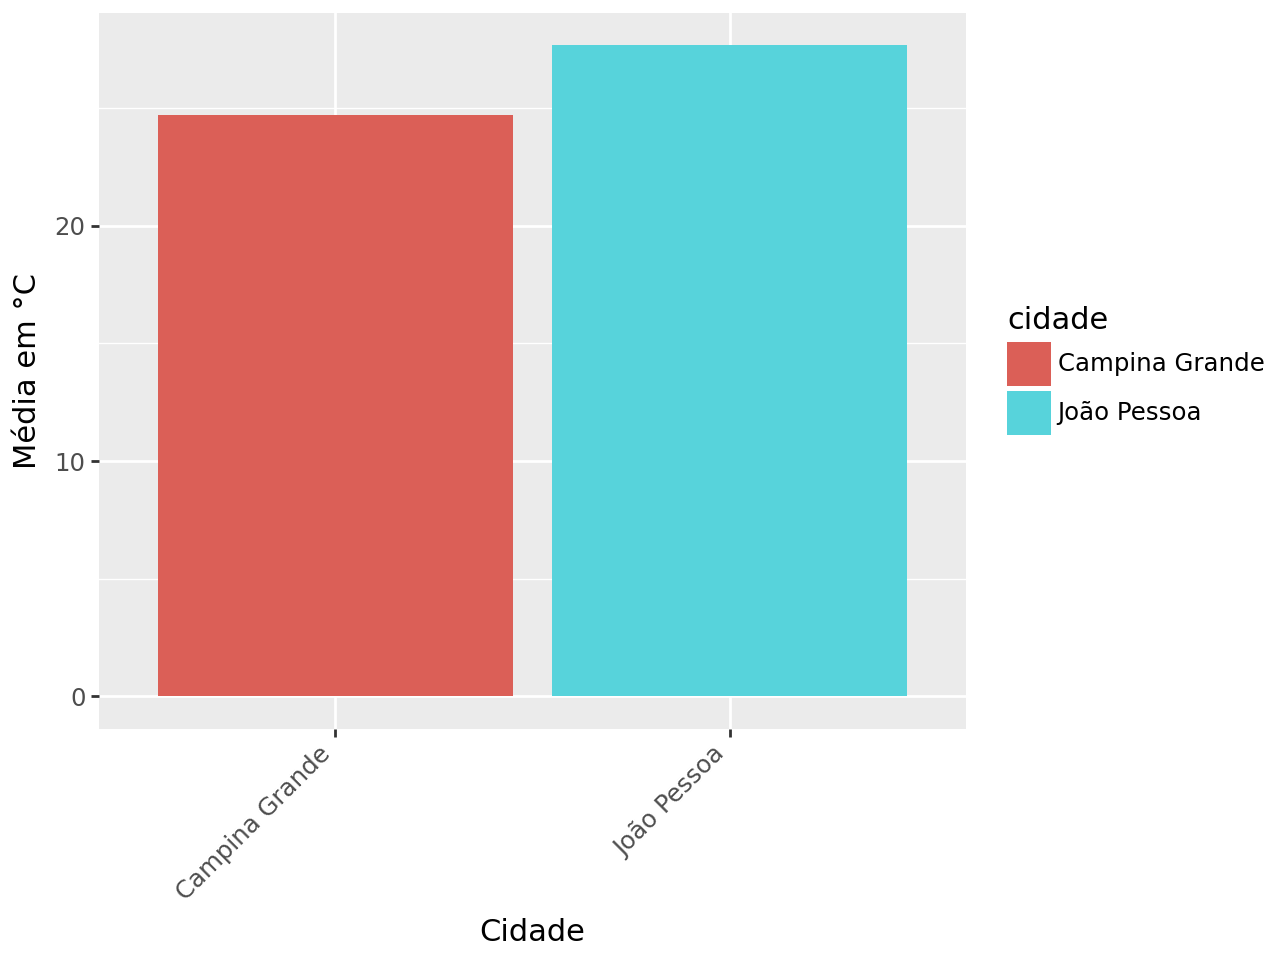

In [291]:
media_temp = climas.groupby("cidade")["tmedia"].mean().sort_values(ascending=False).reset_index()
print(avg_temp)

(
    ggplot(media_temp) +
    aes(x='cidade', y='tmedia', fill='cidade') +
    geom_col() +
    labs(x="Cidade", y="Média em °C") +
    theme(axis_text_x=element_text(rotation=45, hjust=1))
)

João Pessoa tem uma temperatura média mais alta (27.65 °C) em comparação com Campina Grande (24.69 °C). Portanto, considerando apenas as temperaturas médias, João Pessoa é a cidade mais quente das duas.

           cidade     tmedia
0     João Pessoa  28.650269
1  Campina Grande  25.855466


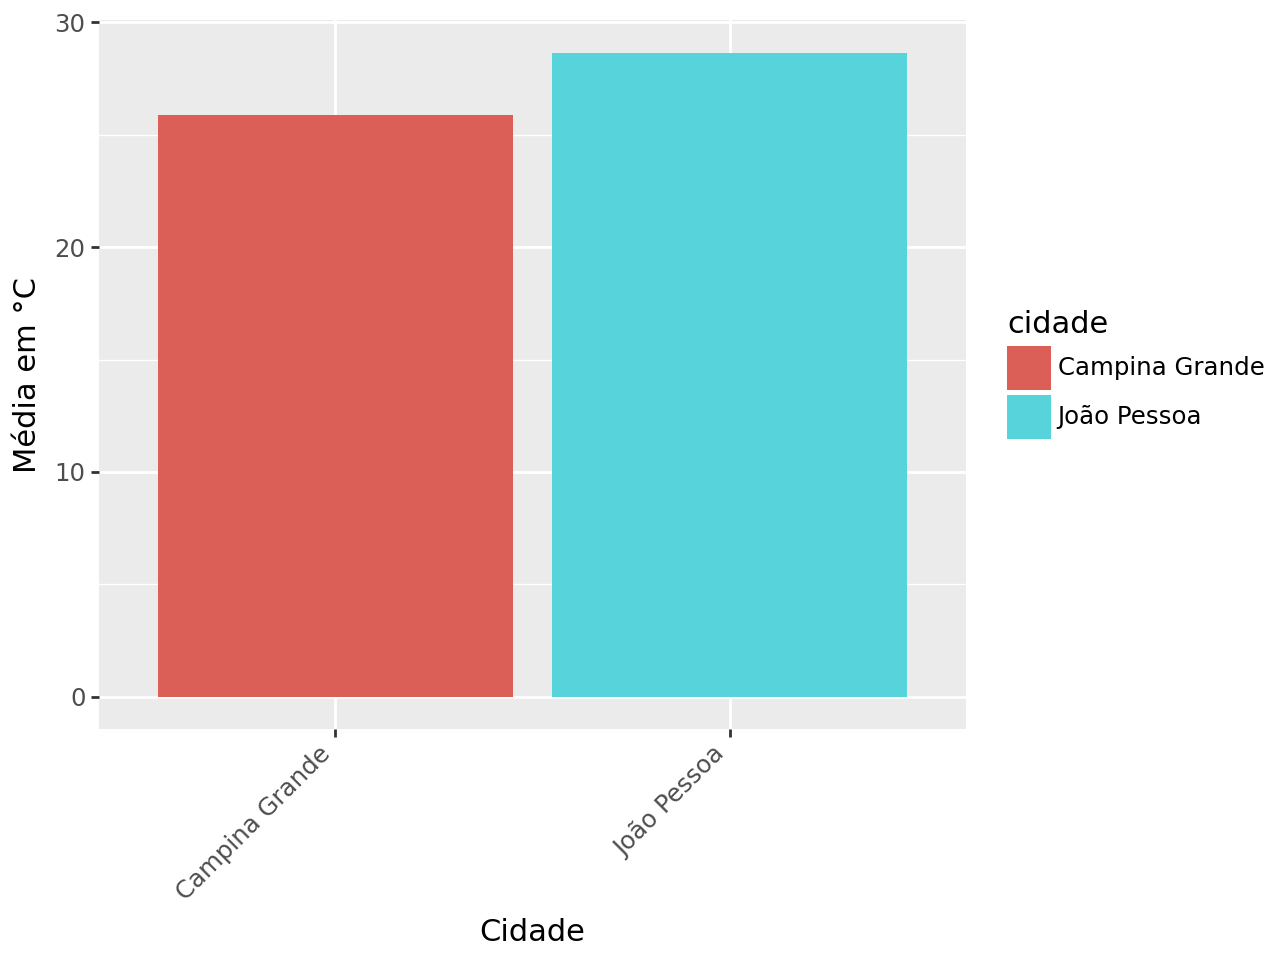

In [292]:
jan_feb = climas.loc[climas["mes"].isin([1, 2])].groupby("cidade")["tmedia"].mean().sort_values(ascending=False).reset_index()
print(jan_feb)

(
    ggplot(jan_feb) +
    aes(x='cidade', y='tmedia', fill='cidade') +
    geom_col() +
    labs(x="Cidade", y="Média em °C") +
    theme(axis_text_x=element_text(rotation=45, hjust=1))
)

Considerando apenas o período de janeiro e fevereiro, que são os meses de pico do verão na região, a conclusão ainda se mantém. João Pessoa continua sendo a cidade mais quente em comparação com Campina Grande. Os dados mostram que durante o período de janeiro e fevereiro, a temperatura média em João Pessoa é de 28.65 °C enquanto em Campina Grande é de 25.86 °C.

### Q2: Quais os meses mais quentes e mais frios? Como você descreveria a temperatura das festas juninas das cidades nos últimos anos?


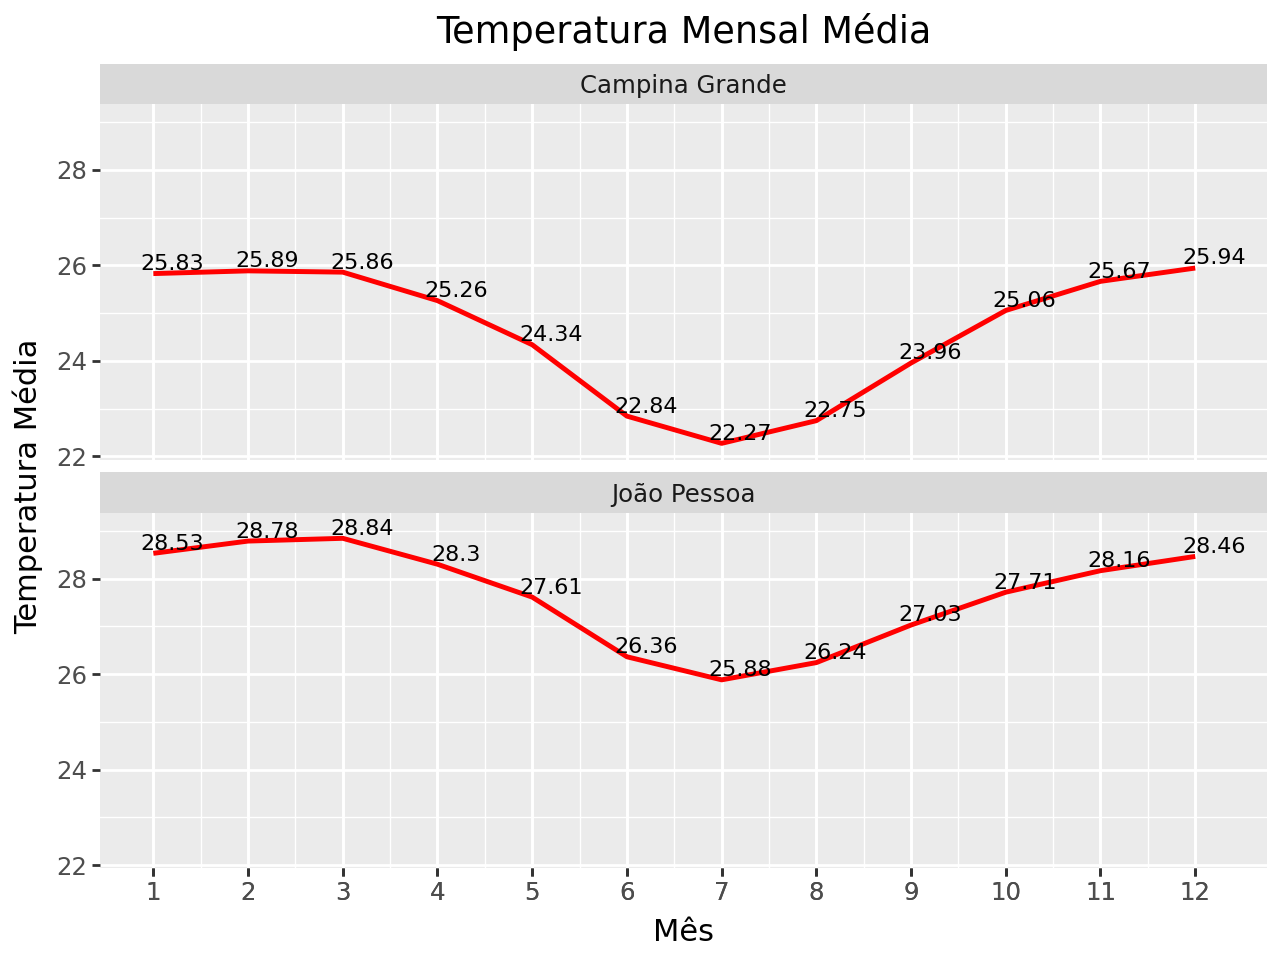

In [293]:
media_temp = climas.groupby(["mes", "cidade"])["tmedia"].mean().reset_index()

(
    ggplot(media_temp) +
    geom_line(aes(x='mes', y='tmedia'), color='red', linetype='solid', size=1) +
    geom_text(aes(x='mes', y='tmedia', label=round(media_temp['tmedia'], 2)), nudge_x=0.2, nudge_y=0.2, size=8) +
    labs(x='Mês', y='Temperature', title='Temperatura Mensal Média') +
    facet_wrap("cidade", ncol=1) +
    labs(y="Temperatura Média") +
    scale_x_continuous(breaks=media_temp['mes'], labels=media_temp['mes'])
)



Para Campina Grande, os meses mais quentes são janeiro, fevereiro, março e dezembro, com temperaturas médias em torno de 25,83 °C, 25.89 °C, 25.86 °C e 25.94 °C, respectivamente. Os meses mais frios são junho, julho e agosto, com temperaturas médias em torno de 22.84 °C, 22.27 °C e 22.75 °C, respectivamente.

Para João Pessoa, os meses mais quentes são janeiro, fevereiro, março e dezembro, com temperaturas médias em torno de 28,53 °C, 28.78 °C, 28.84 °C e 28.46 °C, respectivamente. Os meses mais frios são junho, julho e agosto, com temperaturas médias em torno de 26.36 °C, 25.88 °C e 26.24 °C, respectivamente.



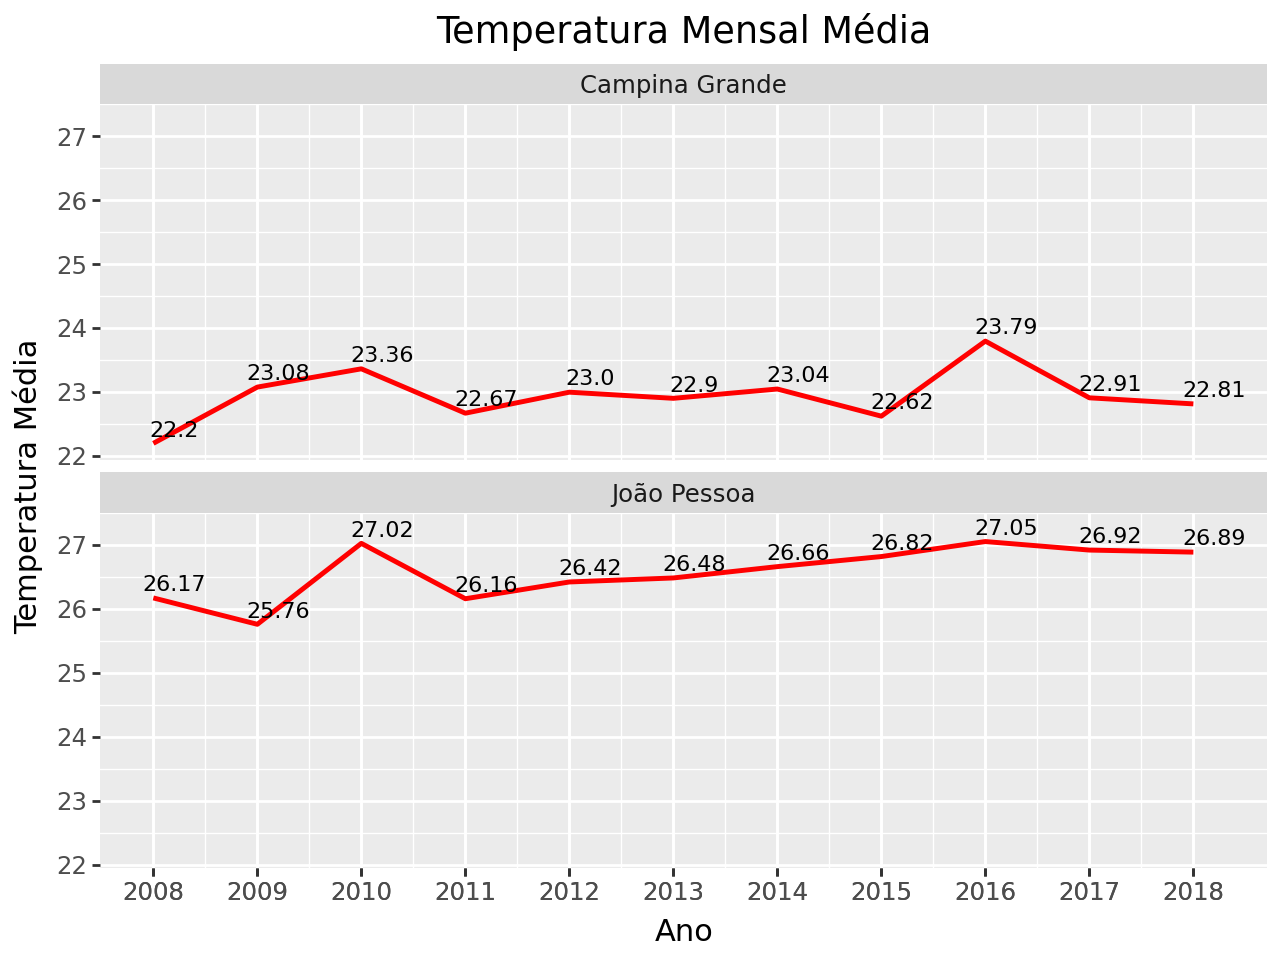

In [294]:
media_junho = climas.loc[(climas["mes"] == 6) & (climas["cidade"].isin(["Campina Grande", "João Pessoa"]))].groupby(["ano", "cidade"])["tmedia"].mean().reset_index()

media_junho = media_junho[media_junho['ano'] >= media_junho['ano'].max() - 10].reset_index()

(
    ggplot(media_junho) +
    geom_line(aes(x='ano', y='tmedia'), color='red', linetype='solid', size=1) +
    geom_text(aes(x='ano', y='tmedia', label=round(media_junho['tmedia'], 2)), nudge_x=0.2, nudge_y=0.2, size=8) +
    labs(x='Ano', y='Temperatura', title='Temperatura Mensal Média') +
    facet_wrap("cidade", ncol=1) +
    labs(y="Temperatura Média") +
    scale_x_continuous(breaks=media_junho['ano'], labels=media_junho['ano'])
)



### Q3: Quanto chove por semana em JP e CG? Descreva a distribuição do volume de chuvas para as cidades?

           cidade      chuva
0     João Pessoa  32.648491
1  Campina Grande  13.997304


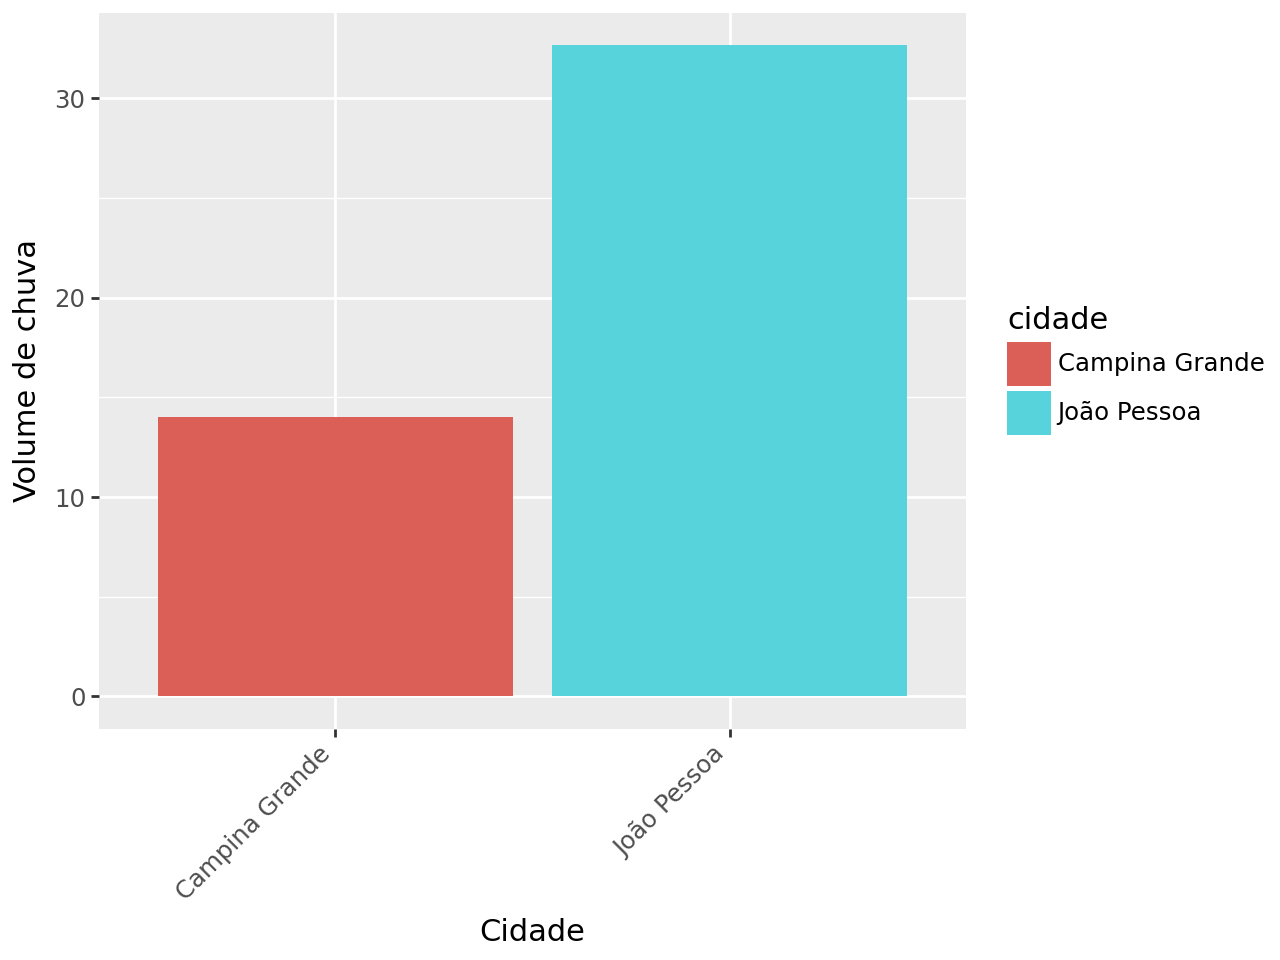

In [295]:
avg_chuva = climas.groupby("cidade")["chuva"].mean().sort_values(ascending=False).reset_index()
print(avg_chuva)

(
    ggplot(avg_chuva) +
    aes(x='cidade', y='chuva', fill='cidade') +
    geom_col() +
    labs(x="Cidade", y="Volume de chuva") +
    theme(axis_text_x=element_text(rotation=45, hjust=1))
)

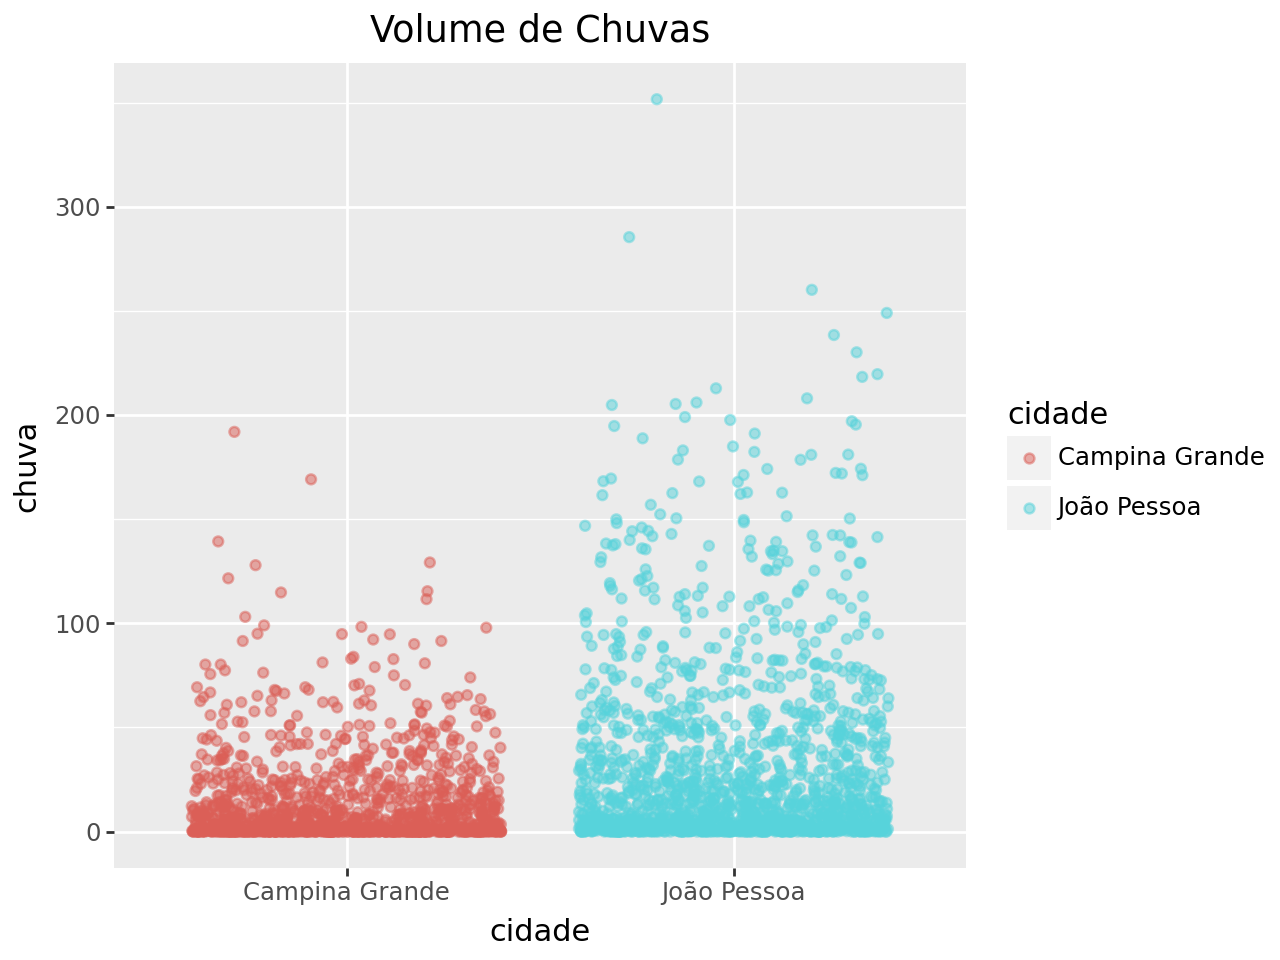

In [296]:
chuvas_por_semana = climas.groupby(['semana', 'cidade'])['chuva'].sum().reset_index()

(
    ggplot(chuvas_por_semana)
    + aes(x="cidade", y="chuva", color="cidade")
    + geom_jitter(alpha = .5)
    + labs(title="Volume de Chuvas")
)

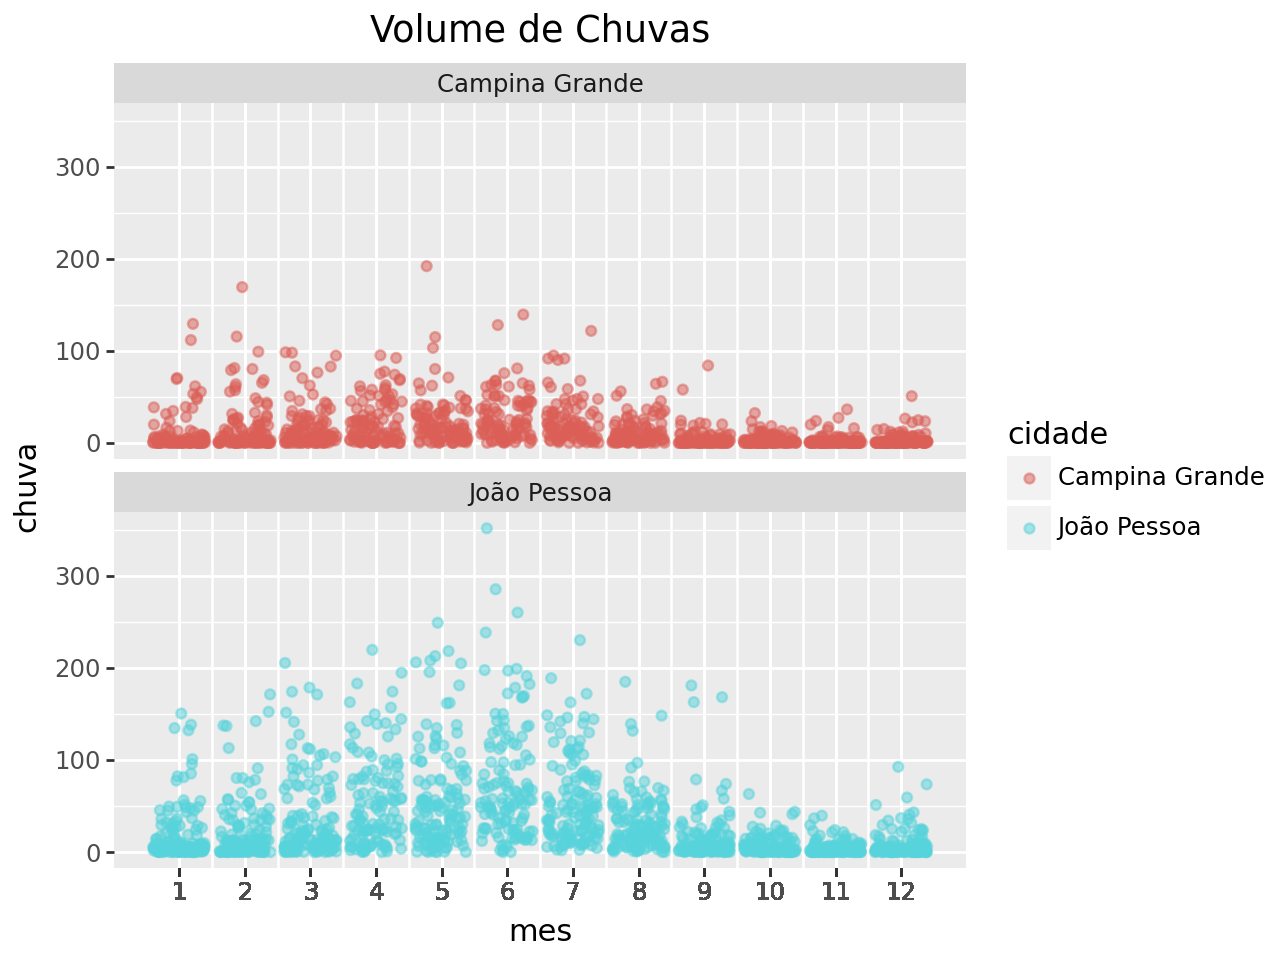

In [297]:
chuvas_por_mes = climas.groupby(['mes', 'cidade'])['chuva'].sum().reset_index()

(
    ggplot(climas)
    + aes(x="mes", y="chuva", color="cidade")
    + geom_jitter(alpha = .5)
    + labs(title="Volume de Chuvas")
    + facet_wrap("cidade", ncol=1)
    + scale_x_continuous(breaks=climas['mes'], labels=climas['mes'])
)

A média do volume de chuva por semana é significativamente maior em João Pessoa em comparação com Campina Grande. Em João Pessoa, a média do volume de chuva por semana é de aproximadamente 32.65 mm enquanto em Campina Grande é de aproximadamente 13.99 mm.

É possível verificar que o volume de chuvas em João Pessoa são mais distribuídos do que em Campina Grande e que os meses com menor volume de chuva são os meses de outubro, novembro e dezembro. 

### Q4: Qual a relação entre a temperatura de uma semana e a temperatura da semana anterior (descreva para as duas cidades)?

Correlação entre CG: 0.8801680269307366
Correlação entre JP: 0.8593718569968766


/tmp/ipykernel_26494/4128282892.py:36: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


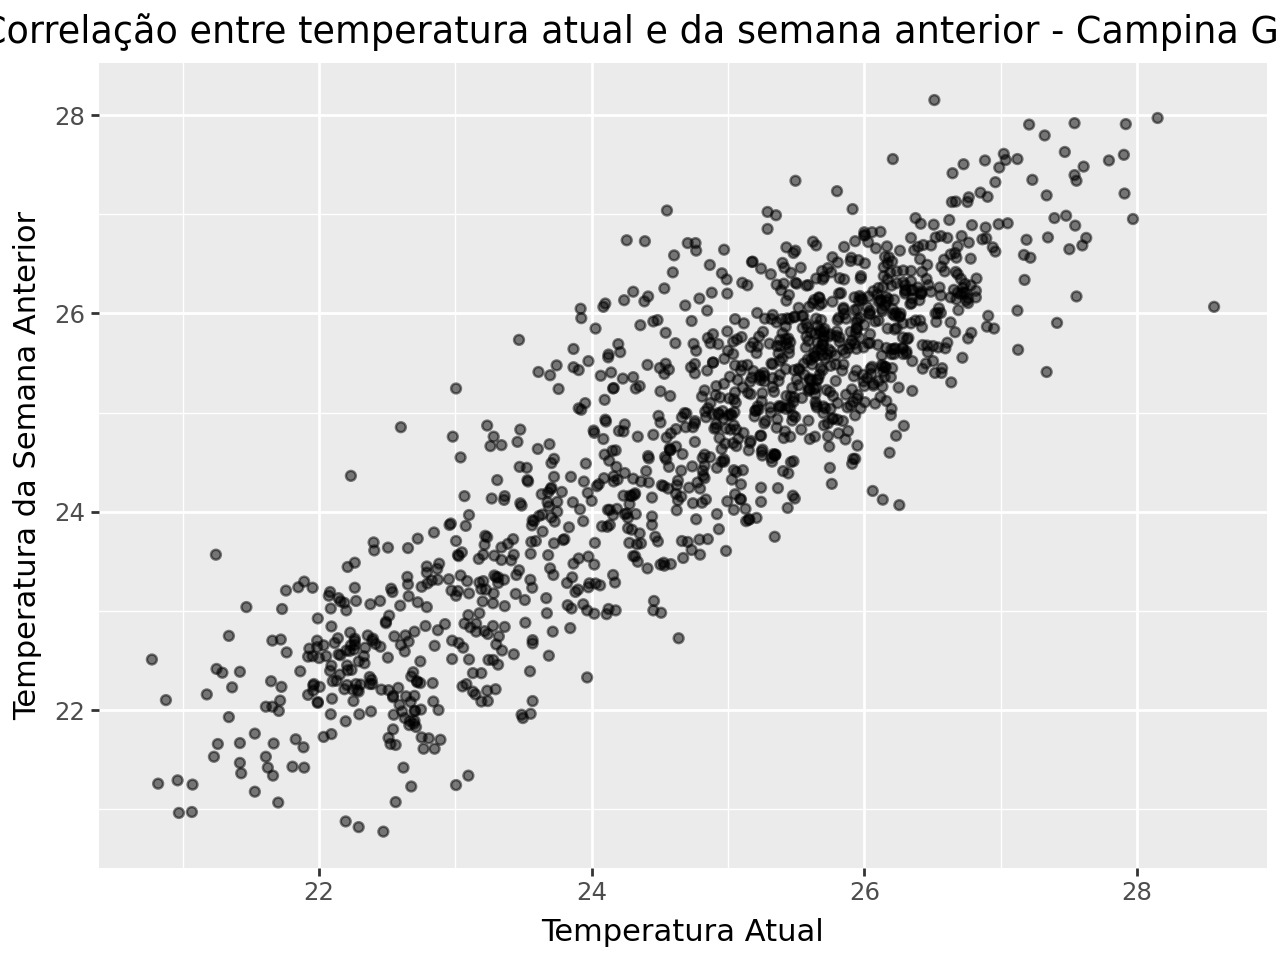

/tmp/ipykernel_26494/4128282892.py:37: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


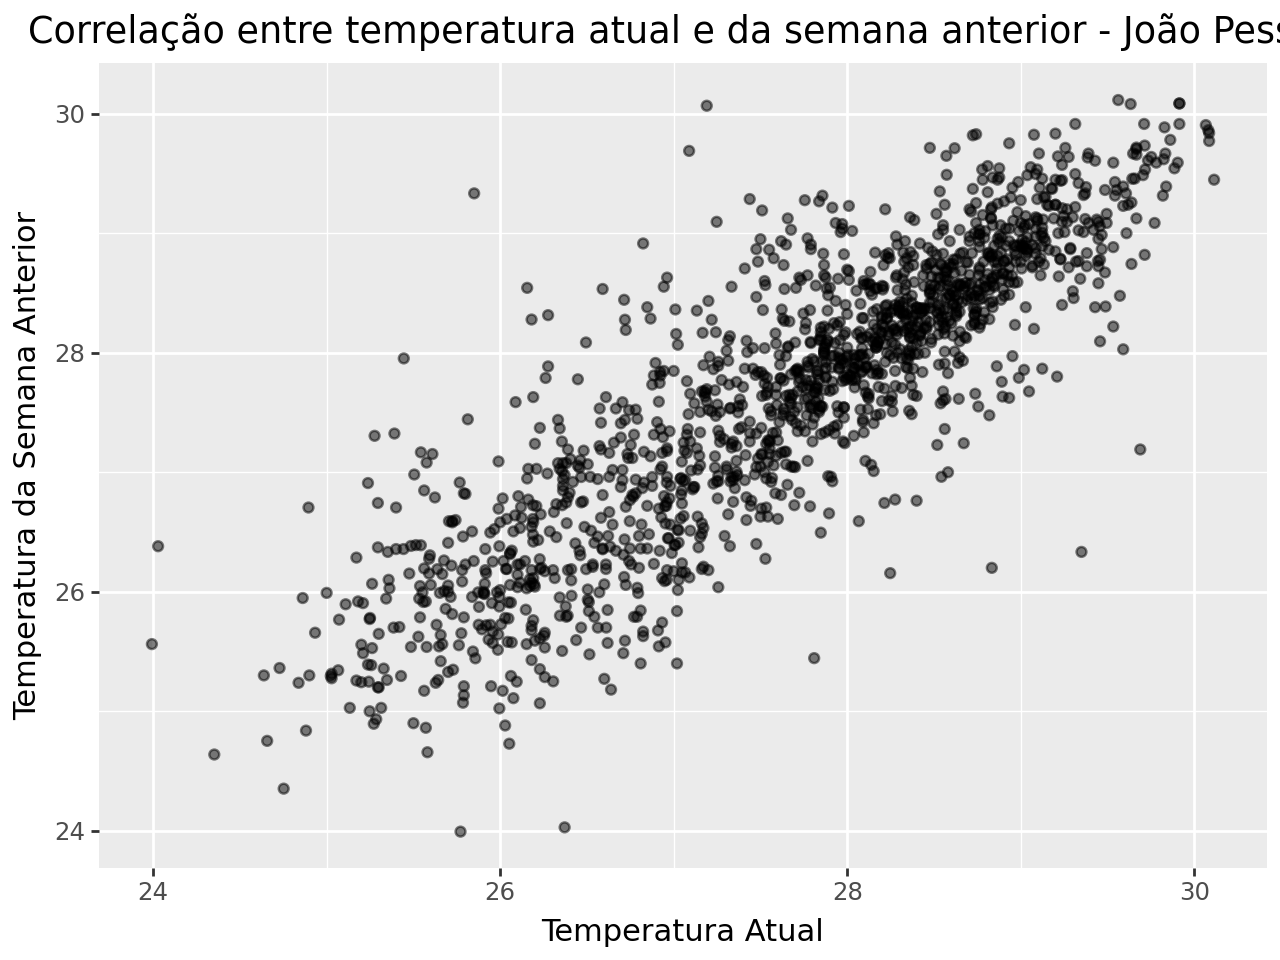

In [301]:

# Filtra e processa os dados para Campina Grande
temperatura_cg = climas[climas['cidade'] == "Campina Grande"]
temperatura_cg = temperatura_cg.sort_values(by='semana')
temperatura_cg['tmedia_anterior'] = temperatura_cg['tmedia'].shift(1)
temperatura_cg = temperatura_cg.dropna()

# Filtra e processa os dados para João Pessoa
temperatura_jp = climas[climas['cidade'] == "João Pessoa"]
temperatura_jp = temperatura_jp.sort_values(by='semana')
temperatura_jp['tmedia_anterior'] = temperatura_jp['tmedia'].shift(1)
temperatura_jp = temperatura_jp.dropna()

# Calcula a correlação entre as temperaturas médias da semana anterior para cada cidade
correlacao_cg = temperatura_cg['tmedia'].corr(temperatura_cg['tmedia_anterior'])
correlacao_jp = temperatura_jp['tmedia'].corr(temperatura_jp['tmedia_anterior'])

print("Correlação entre CG:", correlacao_cg)
print("Correlação entre JP:", correlacao_jp)

plot_cg = (
    ggplot(temperatura_cg, aes(x='tmedia', y='tmedia_anterior')) +
    geom_point(alpha = .5) +
    labs(title="Correlação entre temperatura atual e da semana anterior - Campina Grande",
         x="Temperatura Atual",
         y="Temperatura da Semana Anterior")
)

plot_jp = (
    ggplot(temperatura_jp, aes(x='tmedia', y='tmedia_anterior')) +
    geom_point(alpha = .5) +
    labs(title="Correlação entre temperatura atual e da semana anterior - João Pessoa",
         x="Temperatura Atual",
         y="Temperatura da Semana Anterior")
)

print(plot_cg)
print(plot_jp)

### Q5: Qual a relação entre temperatura e chuvas nas semanas em que choveu (descreva para as duas cidades)?

/tmp/ipykernel_26494/871392558.py:22: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


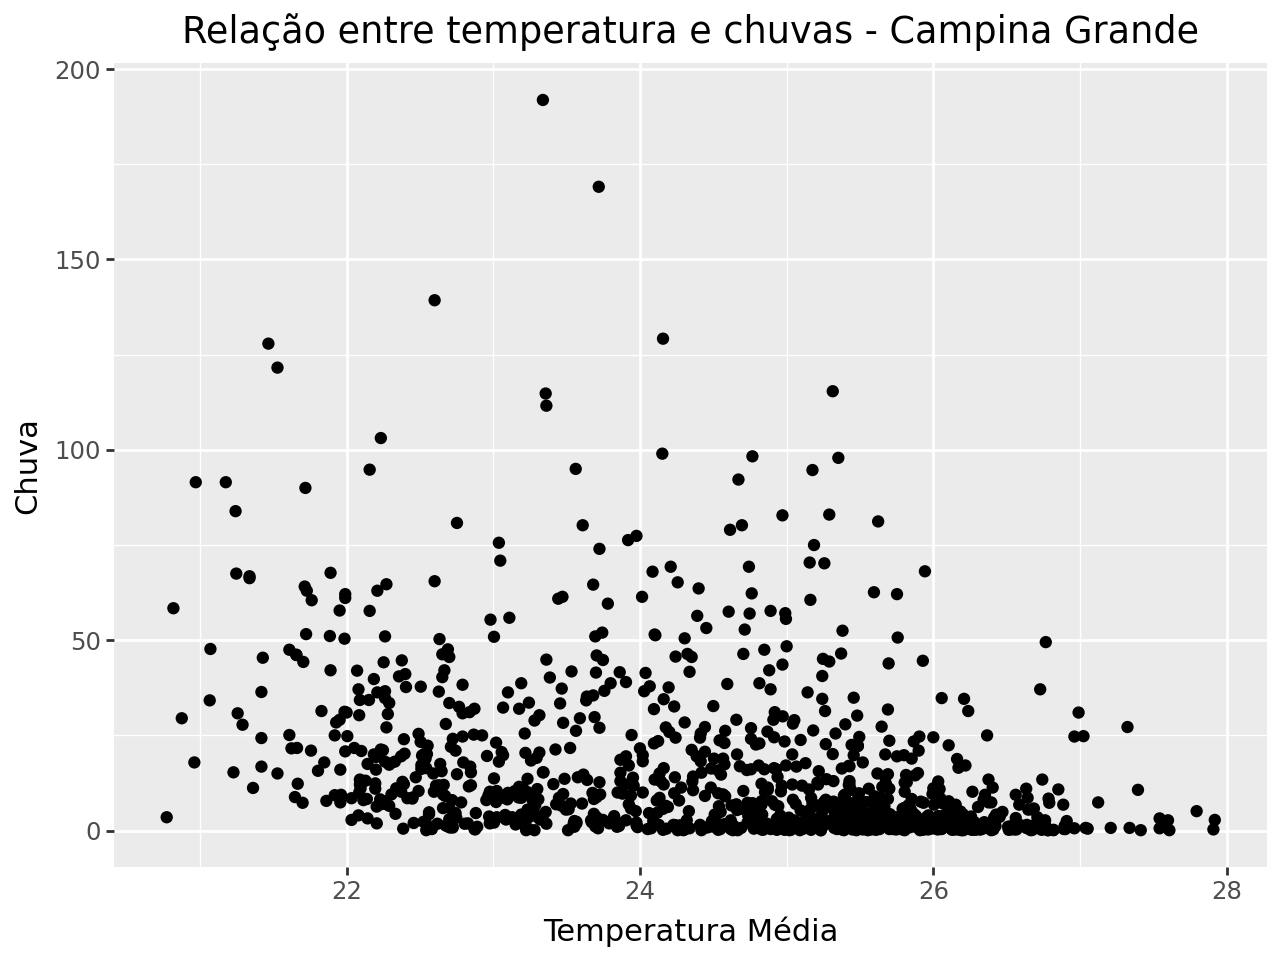

/tmp/ipykernel_26494/871392558.py:23: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


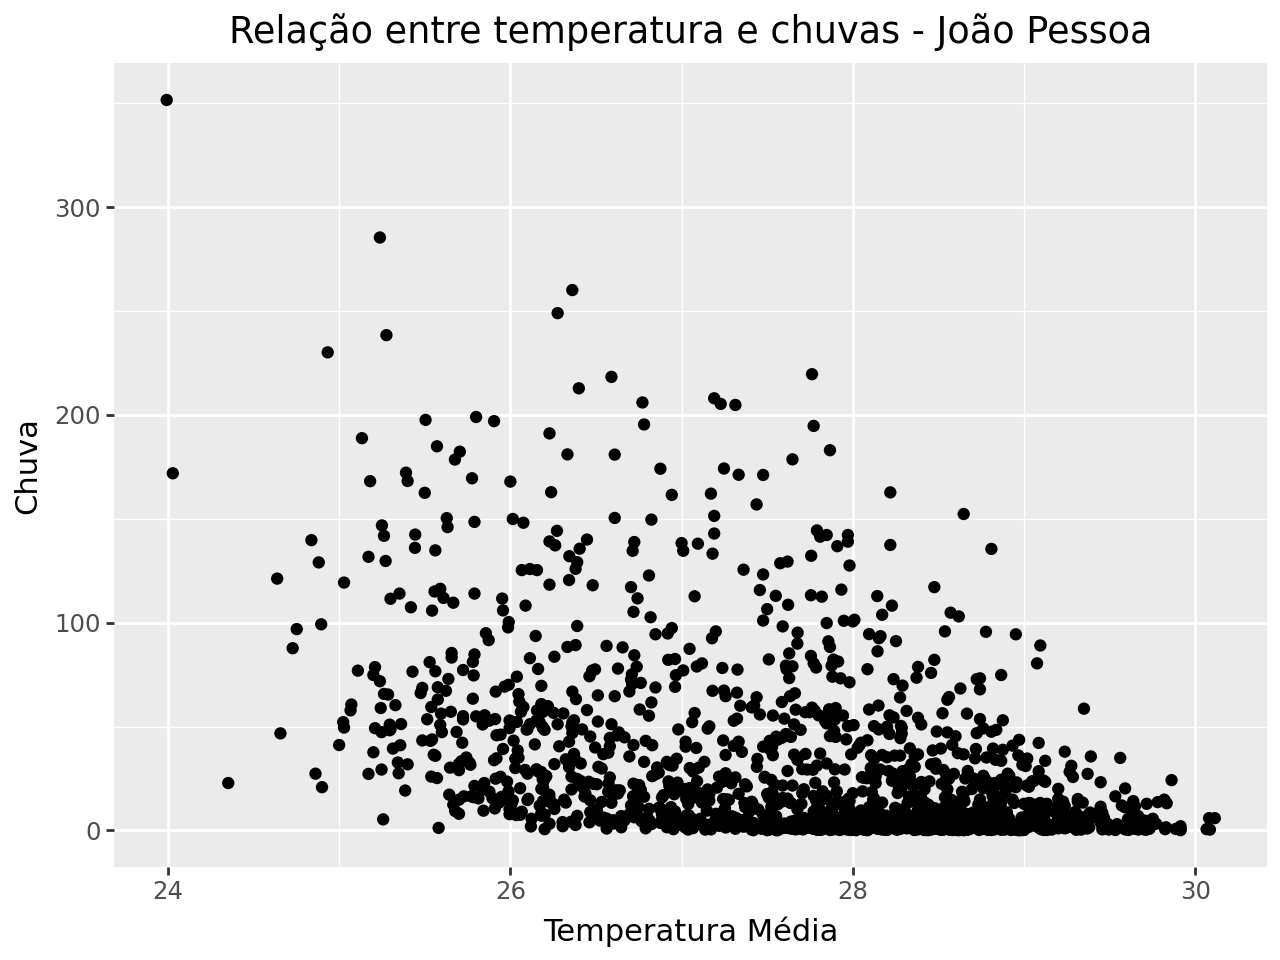

In [299]:
# Filtra as semanas em que houve chuva nas cidades de Campina Grande e João Pessoa
semanas_chuva_cg = climas.loc[(climas['cidade'] == 'Campina Grande') & (climas['chuva'] > 0)]
semanas_chuva_jp = climas.loc[(climas['cidade'] == 'João Pessoa') & (climas['chuva'] > 0)]

plot_cg = (
    ggplot(semanas_chuva_cg, aes(x='tmedia', y='chuva')) +
    geom_point() +
    labs(title="Relação entre temperatura e chuvas - Campina Grande",
         x="Temperatura Média",
         y="Chuva")
)

plot_jp = (
    ggplot(semanas_chuva_jp, aes(x='tmedia', y='chuva')) +
    geom_point() +
    labs(title="Relação entre temperatura e chuvas - João Pessoa",
         x="Temperatura Média",
         y="Chuva")
)

print(plot_cg)
print(plot_jp)


/tmp/ipykernel_26494/3609438073.py:28: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


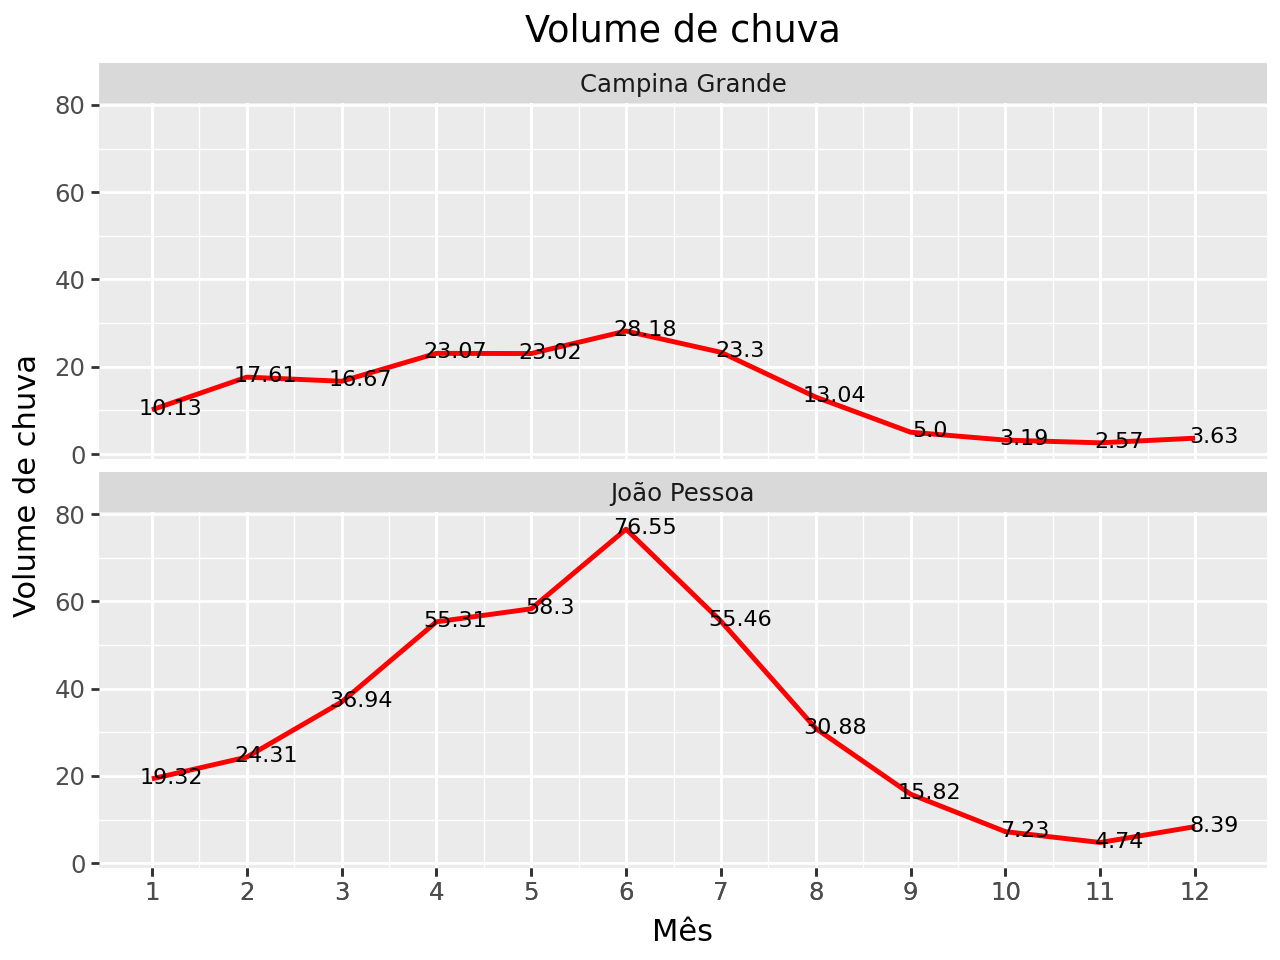

/tmp/ipykernel_26494/3609438073.py:28: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


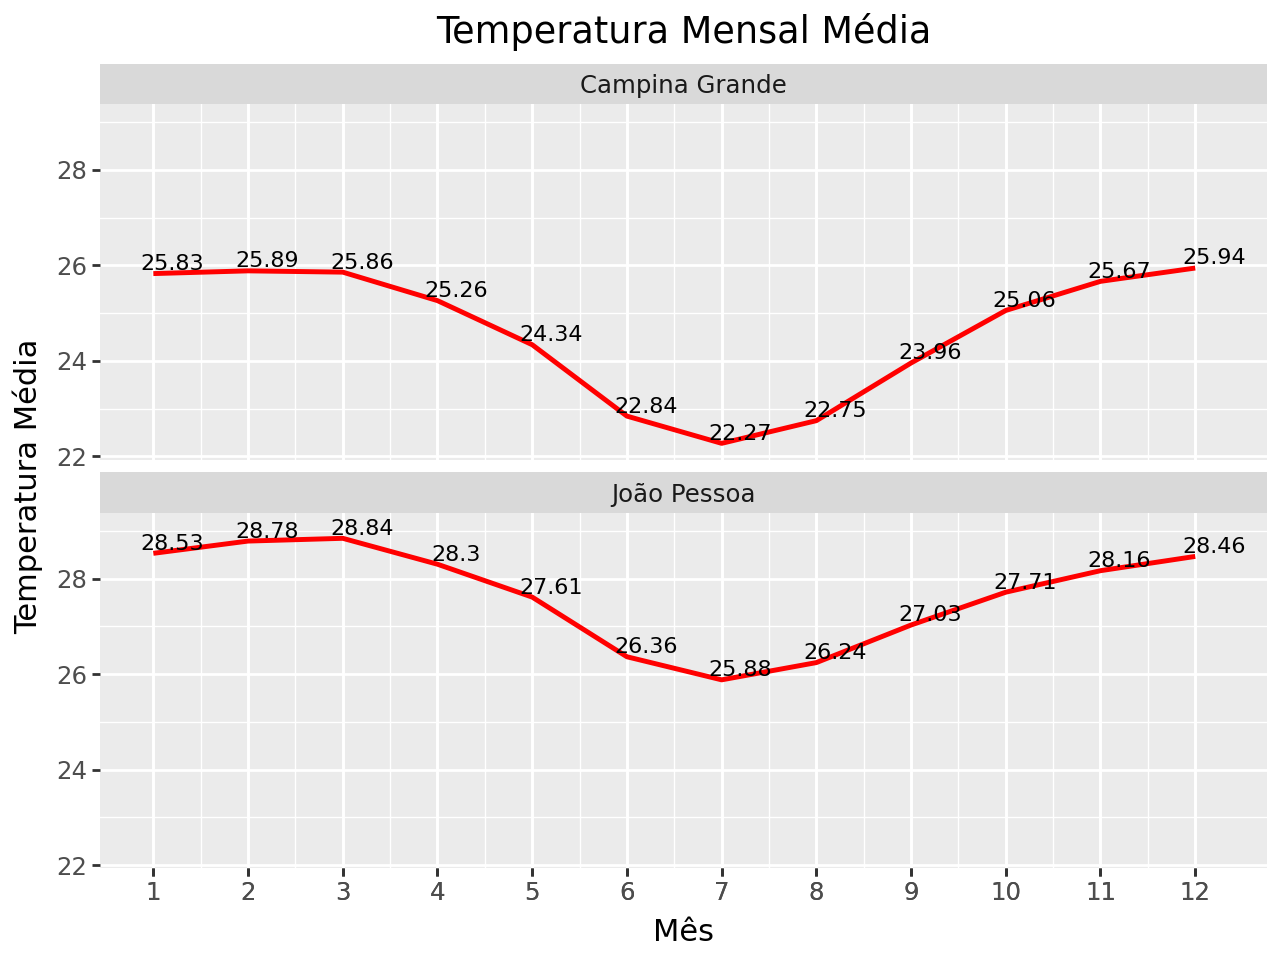

(<Figure Size: (640 x 480)>, <Figure Size: (640 x 480)>, <plotnine.facets.facet_wrap.facet_wrap object at 0x721ce2360c40>)


In [300]:
media_chuva = climas.loc[(climas['cidade'] == 'Campina Grande') & (climas['chuva'] > 0)]

media_chuva = climas.groupby(["mes", "cidade"])["chuva"].mean().reset_index()

media_temp = climas.groupby(["mes", "cidade"])["tmedia"].mean().reset_index()

plot_chuva =(
    ggplot(media_chuva) +
    geom_line(aes(x='mes', y='chuva'), color='red', linetype='solid', size=1) +
    geom_text(aes(x='mes', y='chuva', label=round(media_chuva['chuva'], 2)), nudge_x=0.2, nudge_y=0.2, size=8) +
    labs(x='Mês', y='Volume', title='Volume de chuva') +
    facet_wrap("cidade", ncol=1) +
    labs(y="Volume de chuva") +
    scale_x_continuous(breaks=media_temp['mes'], labels=media_temp['mes'])
)

plot_temp = (
    ggplot(media_temp) +
    geom_line(aes(x='mes', y='tmedia'), color='red', linetype='solid', size=1) +
    geom_text(aes(x='mes', y='tmedia', label=round(media_temp['tmedia'], 2)), nudge_x=0.2, nudge_y=0.2, size=8) +
    labs(x='Mês', y='Temperature', title='Temperatura Mensal Média') +
    facet_wrap("cidade", ncol=1) +
    labs(y="Temperatura Média") +
    scale_x_continuous(breaks=media_temp['mes'], labels=media_temp['mes'])
)

plot_grid = (plot_chuva, plot_temp, facet_wrap("cidade", ncol=3))
print(plot_grid)

Analisando os gráficos que mostram a temperatura mensal média e o volume de chuva ao longo do tempo é possível notar uma aparente relação inversamente proporcional entre esses fenômenos, indicando uma tendência de quando a temperatura está alta, a quantidade de chuva seja menor, e qaundo a temperatura está baixa o volume de chuva aumenta.